In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
from preprocessing import filter_embedding_options, EMBEDDING_OPTIONS

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [5]:
experiment_id = 100 # 97 # 100
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

In [6]:
experiment_info

{'ID': 100,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'blues'],
   ['classical', 'classical'],
   ['country', 'country'],
   ['disco', 'disco'],
   ['hiphop', 'hiphop'],
   ['jazz', 'jazz'],
   ['metal', 'metal'],
   ['pop', 'pop'],
   ['reggae', 'reggae'],
   ['rock', 'rock']]},
 'type': 'quantum',
 'preprocessing': {'reduction_method': 'pca',
  'scaler': {'Angle': [0, 1.5707963267948966], 'ZZMap': [0, 1], 'IQP': [0, 1]},
  'kwargs': {'ZZMap': {'depth': 10}, 'IQP': {'depth': 10}},
  'embedding_list': ['IQP']},
 'model': {'circuit_list': ['U_5'], 'classification_type': 'ova'},
 'train': {'iterations': 200, 'test_size': 0.3, 'random_state': 39},
 'extra_info': 'main, ova, IQP, ZZMap high depth, 01'}

In [7]:
experiment_time_info

{'pca-8-quantum-IQP-U_5-blues-blues': 1701.9922788143158,
 'pca-8-quantum-IQP-U_5-classical-classical': 1847.557193517685,
 'pca-8-quantum-IQP-U_5-country-country': 1882.9932458400726,
 'pca-8-quantum-IQP-U_5-disco-disco': 2141.29372215271,
 'pca-8-quantum-IQP-U_5-hiphop-hiphop': 1728.8224630355835,
 'pca-8-quantum-IQP-U_5-jazz-jazz': 1574.4918196201324,
 'pca-8-quantum-IQP-U_5-metal-metal': 1551.128380537033,
 'pca-8-quantum-IQP-U_5-pop-pop': 1757.0796678066254,
 'pca-8-quantum-IQP-U_5-reggae-reggae': 2039.9537343978882,
 'pca-8-quantum-IQP-U_5-rock-rock': 1961.6111161708832}

In [8]:
result_data.head()

,model,circuit,circuit_param_count,reduction_method,reduction_size,embedding_option,embedding_class,embedding_permutation,target_levels_list,target_levels,accuracy,precision,recall,f1,loss_train_history,loss_test_history,y_hat,y_test
0,pca-8-quantum-IQP-U_5-blues-blues,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[blues, blues]",blues-blues,0.570,0.163,0.962,0.279,0 16.908 1 19.028 2 17.691 3 ...,0 18.767 1 19.596 2 20.261 3 ...,0 1 1 1 2 0 3 1 4 1 ...,0 1 1 1 2 0 3 1 4 1 ...
1,pca-8-quantum-IQP-U_5-classical-classical,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[classical, classical]",classical-classical,0.827,0.338,0.828,0.480,0 20.588 1 19.307 2 17.937 3 ...,0 19.874 1 25.701 2 22.274 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 1 4 0 ...
2,pca-8-quantum-IQP-U_5-country-country,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[country, country]",country-country,0.550,0.178,0.824,0.293,0 16.286 1 16.000 2 16.127 3 ...,0 21.789 1 18.629 2 19.354 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 1 1 1 2 1 3 1 4 1 ...
3,pca-8-quantum-IQP-U_5-disco-disco,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[disco, disco]",disco-disco,0.600,0.170,0.889,0.286,0 25.905 1 15.812 2 17.288 3 ...,0 25.575 1 17.567 2 17.145 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 1 2 1 3 0 4 1 ...
4,pca-8-quantum-IQP-U_5-hiphop-hiphop,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[hiphop, hiphop]",hiphop-hiphop,0.833,0.315,0.567,0.405,0 18.541 1 16.902 2 17.468 3 ...,0 18.845 1 18.148 2 18.989 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 0 4 0 ...


In [9]:
result_data.shape

(10, 18)

In [10]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-Angle-U_5"
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/matt/dev/projects/quantum-cnn/experiments/100/pca-8-quantum-Angle-U_5-yclass-multi.csv'

In [11]:
print(confusion_metrics)

NameError: name 'confusion_metrics' is not defined

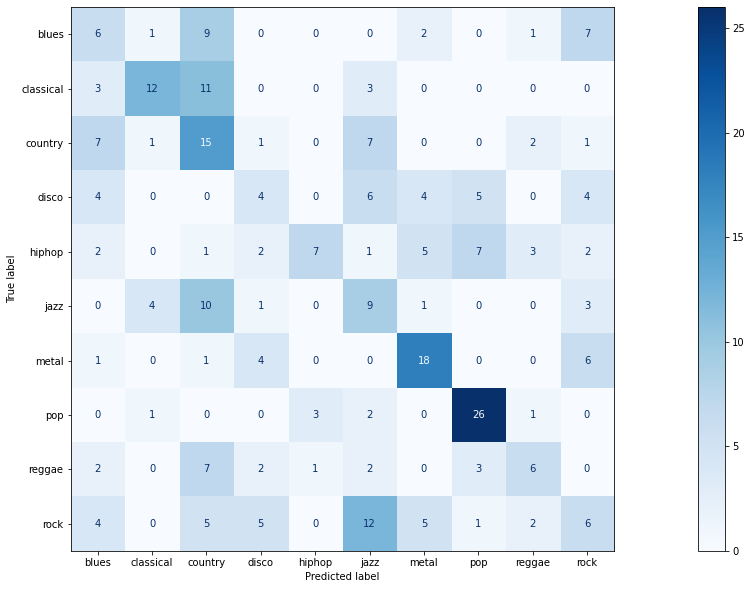

In [12]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-IQP-U_5"
)

In [13]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.21      0.23      0.22        26
   classical       0.63      0.41      0.50        29
     country       0.25      0.44      0.32        34
       disco       0.21      0.15      0.17        27
      hiphop       0.64      0.23      0.34        30
        jazz       0.21      0.32      0.26        28
       metal       0.51      0.60      0.55        30
         pop       0.62      0.79      0.69        33
      reggae       0.40      0.26      0.32        23
        rock       0.21      0.15      0.17        40

    accuracy                           0.36       300
   macro avg       0.39      0.36      0.36       300
weighted avg       0.39      0.36      0.36       300



In [14]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

,rock,disco,metal,classical,blues,hiphop,pop,jazz,country,reggae,Average
rock,0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667
disco,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600
metal,NaN,NaN,0.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833
classical,NaN,NaN,NaN,0.827,NaN,NaN,NaN,NaN,NaN,NaN,0.827
blues,NaN,NaN,NaN,NaN,0.57,NaN,NaN,NaN,NaN,NaN,0.570
hiphop,NaN,NaN,NaN,NaN,NaN,0.833,NaN,NaN,NaN,NaN,0.833
pop,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,0.850
jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59,NaN,NaN,0.590
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,0.550
reggae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,0.770


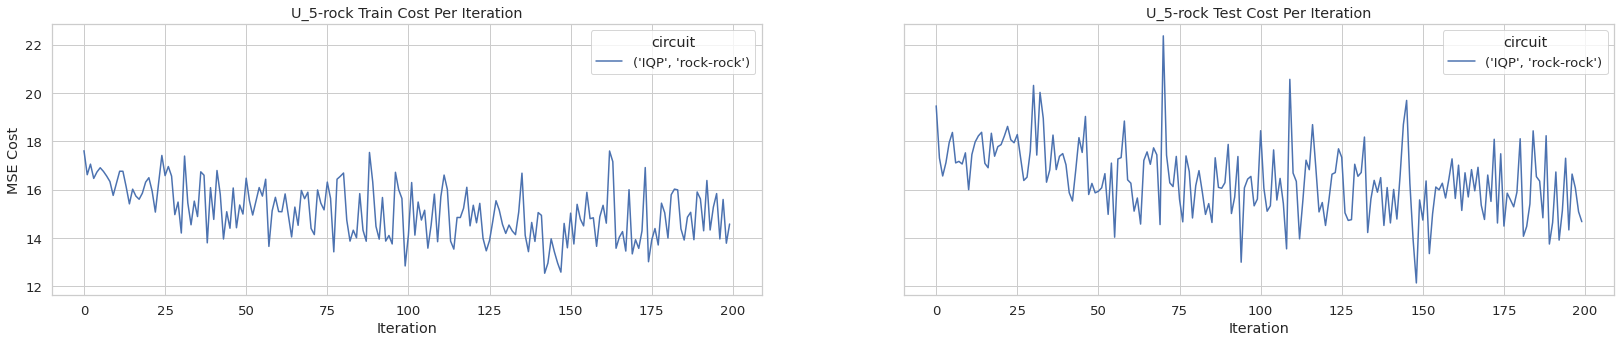

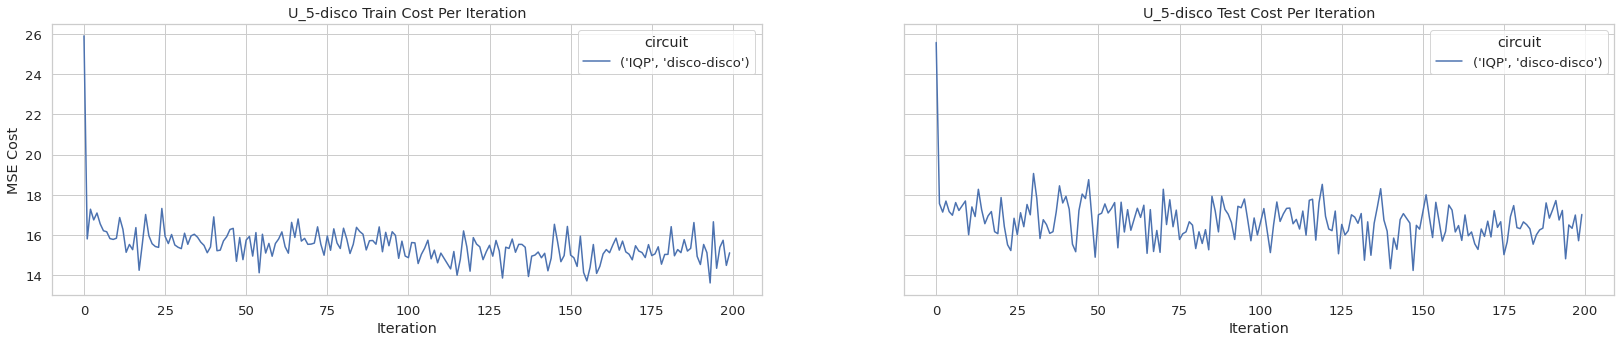

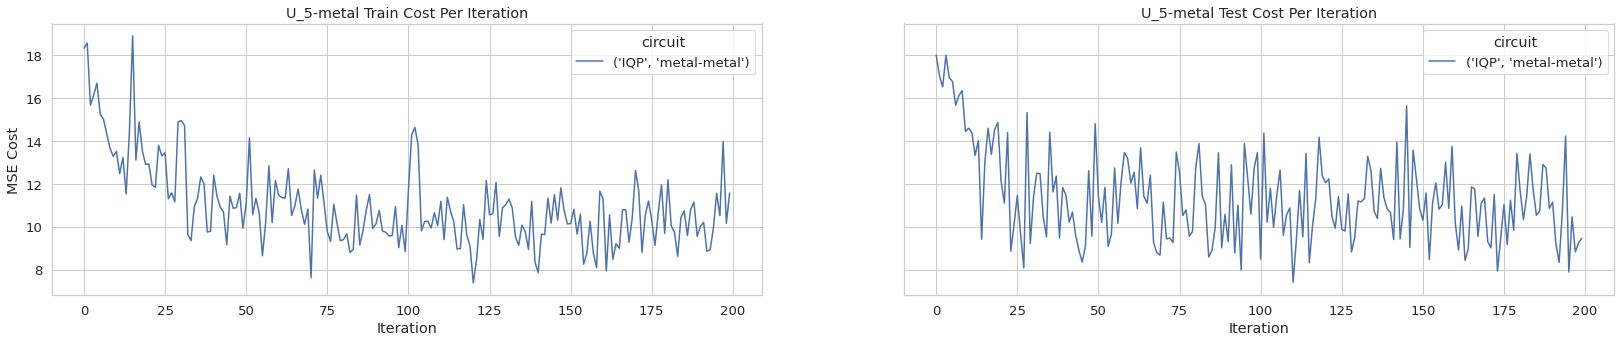

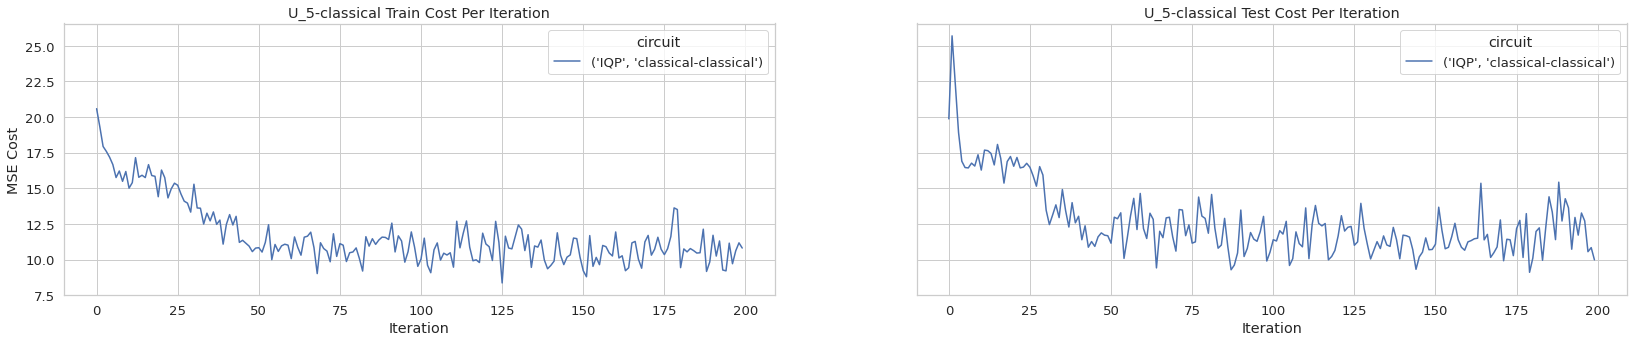

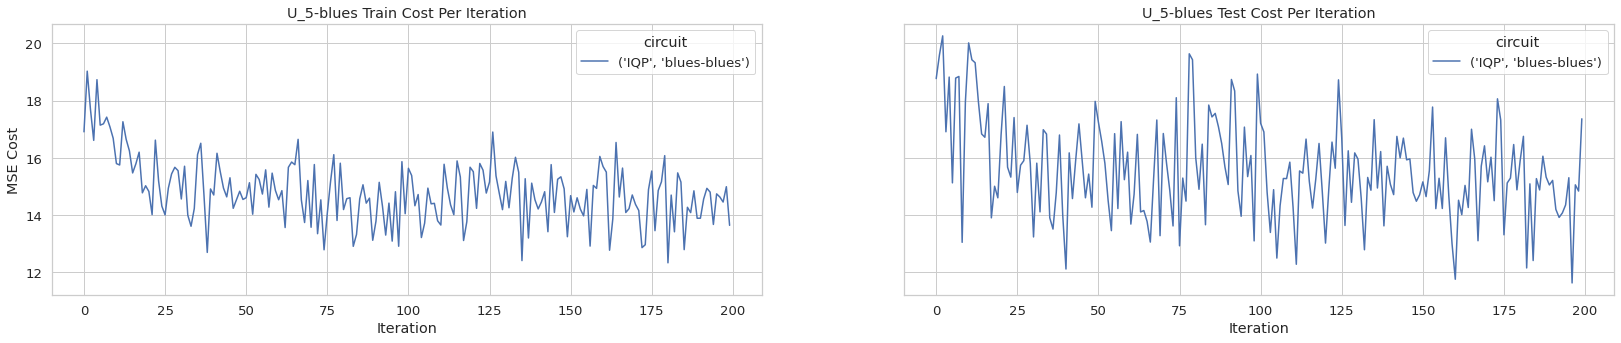

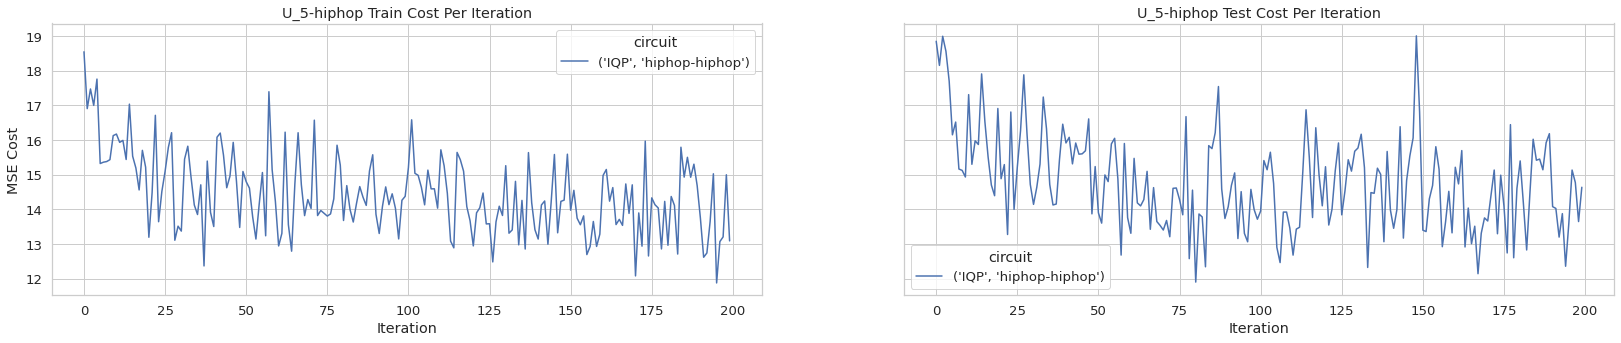

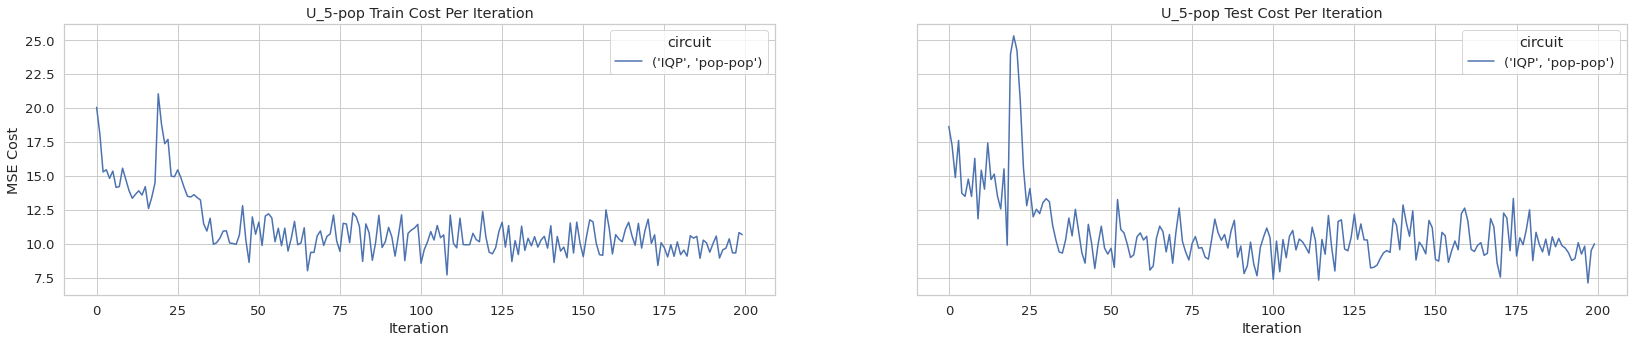

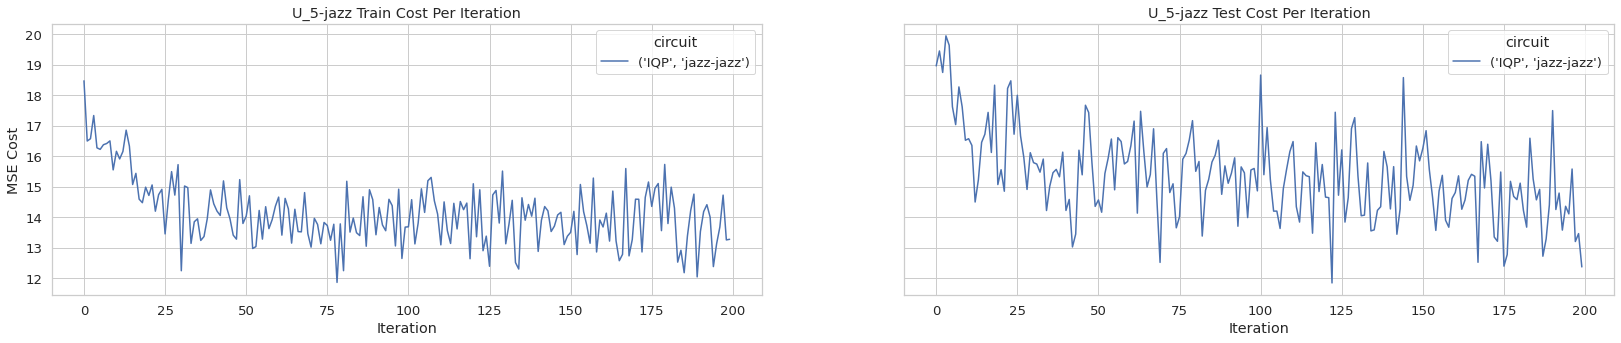

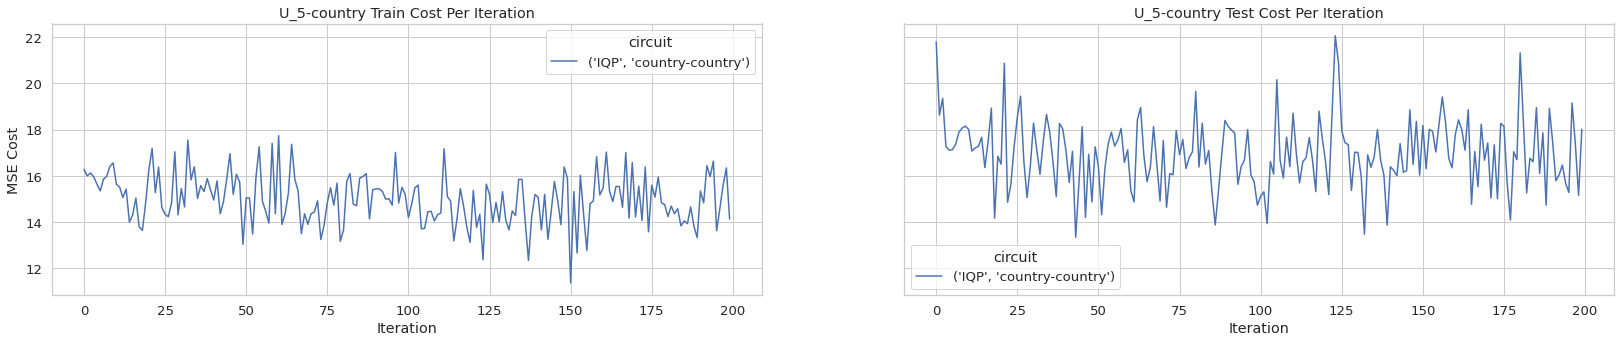

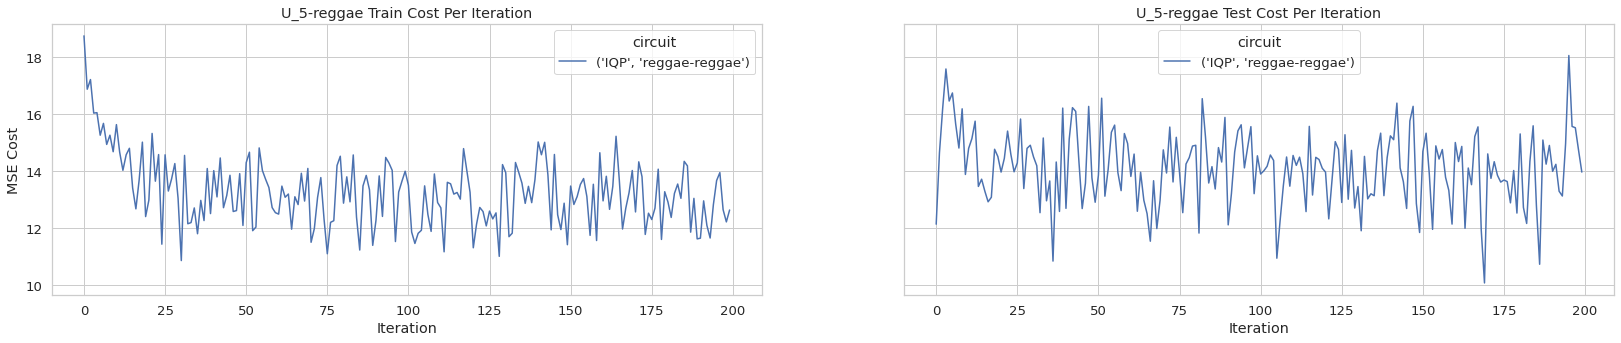

In [15]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
for level in distinct_levels:
    plot_loss(result_data, ["circuit", "embedding_option", "target_levels"], [f"{level}"], figsize=(28, 5))